In [22]:
### IMPORT SCIENTIFIC LIBRARIES ###
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
import lmfit as lm

from functions import *
from alias import *

# fontsizes
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 16

In [23]:
files = os.listdir('data/fit_out')

LDHO = {}
for f in files:
    if 'L+DHO' in f:
        LDHO[int(f[6:9]) ] = pd.read_csv('data/fit_out/' + f, index_col=0)


[0.5, 0.7, 0.9, 1.1, 1.5]

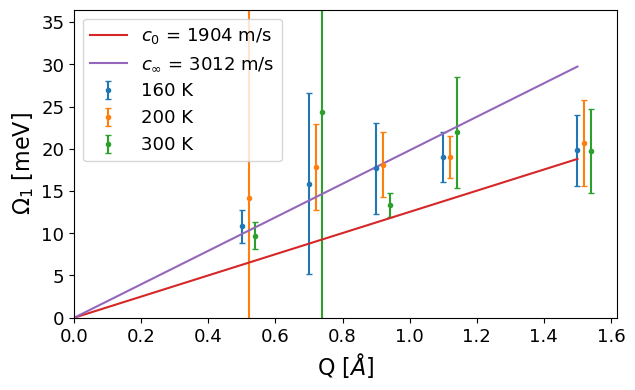

In [43]:
### Omega1 ###
plt.figure(figsize=(7, 4))
dx = {160:0, 200:0.02, 300:0.04}

for T in [160, 200, 300]:
    fitout = LDHO[T]
    plt.errorbar(np.array(Qs)+dx[T], fitout.Omega1, yerr=fitout.dOmega1, fmt='.', capsize=2, label=f'{T} K')

# plot if c0
X = np.linspace(0, Qs[-1], 1000)
c0 = 1904
plt.plot(X, c0* 6.58e-3*X, label=f'$c_0$ = {c0} m/s')

# plot if c1
X = np.linspace(0, Qs[-1], 1000)
cinf = 3012
plt.plot(X, cinf* 6.58e-3*X, label=f'$c_\infty$ = {cinf} m/s')


plt.xlabel('Q [$\AA$]')
plt.ylabel('$\Omega_1$ [meV]')
plt.ylim(0, np.max(fitout.Omega1)*1.5)
plt.xlim(0)
plt.legend()



